In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


def get_data(train_file, test_file = None):
    if test_file == None:
        frame = pd.read_csv(train_file)
        data = frame.values
        np.random.shuffle(data)
        return data
    else:
        train_frame = pd.read_csv(train_file)
        test_frame = pd.read_csv(test_file)

        train_data = train_frame.values
        test_data = test_frame.values
        np.random.shuffle(train_data)
        np.random.shuffle(test_data)

        return train_data, test_data


def get_training_testing_sets(train_file, test_file = None):
    if test_file == None:
        data = get_data(train_file)
        train_data, test_data = train_test_split(data)
    else:

        train_data, test_data = get_data(train_file, test_file)

    X_train = train_data[:, 1:]
    Y_train = train_data[:, :1]
    X_test = test_data[:, 1:]
    Y_test = test_data[:, :1]

    print(X_train.shape, X_test.shape)
    
    return X_train, Y_train, X_test, Y_test




data = get_data('../input/SPAM text message 20170820 - Data.csv')
m = data.shape[0]

print(data[0])




['spam'
 'Congratulations ur awarded 500 of CD vouchers or 125gift guaranteed & Free entry 2 100 wkly draw txt MUSIC to 87066 TnCs www.Ldew.com1win150ppmx3age16']


In [2]:

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


punctuations = string.punctuation
stopwords = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

for i in range(m):
    data[i][1] = ''.join(j for j in data[i][1] if j not in punctuations)
    data[i][1] = ' '.join(lemmatizer.lemmatize(j.lower()) for j in data[i][1].split() if j not in stopwords)

print(data[0])   




['spam'
 'congratulation ur awarded 500 cd voucher 125gift guaranteed free entry 2 100 wkly draw txt music 87066 tncs wwwldewcom1win150ppmx3age16']


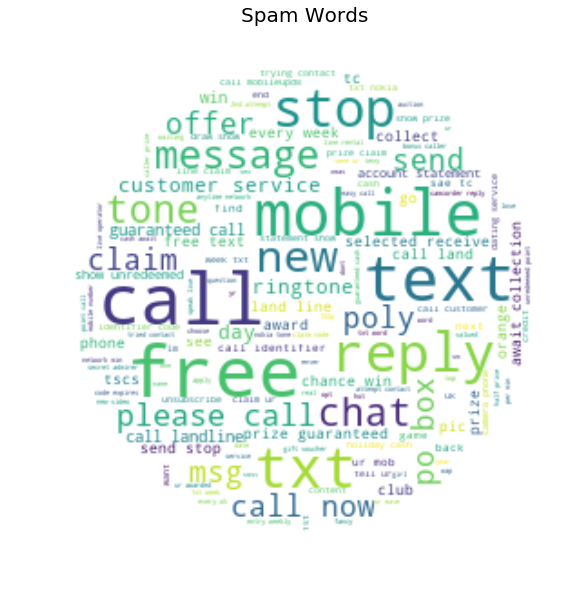

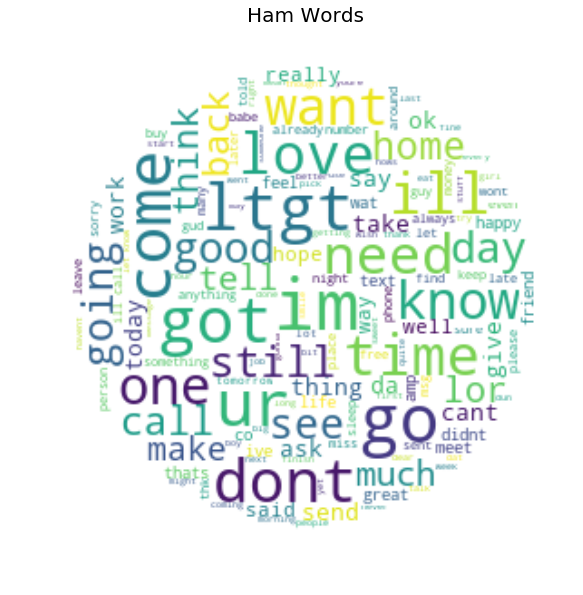

In [3]:
filtered_spam_data = ''
filtered_ham_data = ''
for i in range(data.shape[0]):
    filtered_spam_data +=' '.join(j for j in data[i][1].split() if data[i][0] == 'spam')
    filtered_ham_data +=' '.join(j for j in data[i][1].split() if data[i][0] == 'ham')

 
from wordcloud import WordCloud
from matplotlib import pyplot as plt
%matplotlib inline


x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc = WordCloud(max_font_size=40, max_words=200, background_color='white', random_state=1337, mask=mask).generate(filtered_spam_data)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Spam Words", fontsize=20)
plt.show()

wc = WordCloud(max_font_size=40, max_words=200, background_color='white', random_state=1337, mask=mask).generate(filtered_ham_data)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Ham Words", fontsize=20)
plt.show()



In [4]:


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder



cv = CountVectorizer()
X = cv.fit_transform(data[:, 1])
print(X[0])

le = LabelEncoder()
Y = le.fit_transform(data[:, 0])
print(Y[0])


X_test = X[:1500, :]
X_train = X[1500:, :]

Y_test = Y[:1500]
Y_train = Y[1500:]

print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('Y_train', Y_train.shape)
print('Y_test', Y_test.shape)




  (0, 8807)	1
  (0, 7966)	1
  (0, 863)	1
  (0, 5390)	1
  (0, 8159)	1
  (0, 2851)	1
  (0, 8689)	1
  (0, 289)	1
  (0, 3044)	1
  (0, 3434)	1
  (0, 3763)	1
  (0, 330)	1
  (0, 8429)	1
  (0, 2015)	1
  (0, 680)	1
  (0, 1415)	1
  (0, 8282)	1
  (0, 2313)	1
1
X_train (4072, 8985)
X_test (1500, 8985)
Y_train (4072,)
Y_test (1500,)


In [5]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    results = []
    for clf, name in [(BernoulliNB(),'BernoulliNB'), (SVC(), 'SVC'), (DecisionTreeClassifier(), 'DecisionTreeClassifier', ), (LogisticRegression(), 'LogisticRegression') ]:
    #     Y_train.reshape(Y_train.shape[0],)
    #     Y_test.reshape(Y_test.shape[0])
        clf.fit(X_train, Y_train)
        clf.fit(X_train, Y_train)

        m_test = X_test.shape[0]
        predictions = clf.predict(X_test)

        accuracy = accuracy_score(predictions, Y_test)
        confusion = confusion_matrix(predictions, Y_test)

        results.append([name, accuracy, confusion])

for result in results:
    print(result[0], result[1])
    print(result[2])

BernoulliNB 0.9766666666666667
[[1304   29]
 [   6  161]]
SVC 0.8733333333333333
[[1310  190]
 [   0    0]]
DecisionTreeClassifier 0.964
[[1288   32]
 [  22  158]]
LogisticRegression 0.9846666666666667
[[1310   23]
 [   0  167]]
